<a href="https://colab.research.google.com/github/nandinisitlani2/Tensorflow-Essentials/blob/main/TransferLearning_Scaling_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-04 22:06:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-04 22:06:57 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,unzip_data,plot_loss_curves,compare_historys

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-05-04 22:07:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   245MB/s    in 6.7s    

2023-05-04 22:07:09 (233 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [6]:
unzip_data("101_food_classes_10_percent.zip")

In [7]:
train_dir="101_food_classes_10_percent/train"
test_dir="101_food_classes_10_percent/test"

In [15]:
!ls "101_food_classes_10_percent/train"

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [12]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          )
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          shuffle=True
                                                                          )

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [9]:
checkpoint_path="101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       monitor="val_accuracy")

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
data_augmentation= Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name="data_augmentation")

In [11]:
input_size=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(224,224,3))

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=layers.GlobalAveragePooling2D()(x)

outputs=layers.Dense(101,activation="softmax")(x)

model_0=tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [12]:
model_0.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [13]:
history_0=model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=(0.15*len(test_data)),
            callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 134s 482ms/step - loss: 3.3965 - accuracy: 0.2677 - val_loss: 2.2711 - val_accuracy: 0.4950
Epoch 2/5
237/237 [==============================] - 80s 332ms/step - loss: 2.2110 - accuracy: 0.4943 - val_loss: 1.8371 - val_accuracy: 0.5620
Epoch 3/5
237/237 [==============================] - 75s 313ms/step - loss: 1.8679 - accuracy: 0.5523 - val_loss: 1.6769 - val_accuracy: 0.5764
Epoch 4/5
237/237 [==============================] - 64s 268ms/step - loss: 1.6287 - accuracy: 0.6062 - val_loss: 1.5896 - val_accuracy: 0.5880
Epoch 5/5
237/237 [==============================] - 71s 298ms/step - loss: 1.4852 - accuracy: 0.6323 - val_loss: 1.5397 - val_accuracy: 0.5977


In [14]:
fine_tune_result=model_0.evaluate(test_data)

790/790 [==============================] - 62s 78ms/step - loss: 1.5719 - accuracy: 0.5873


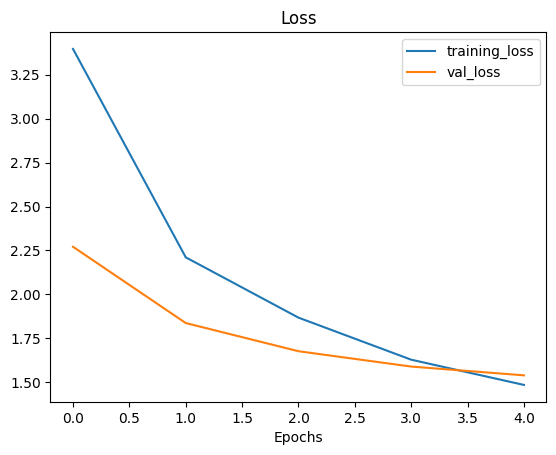

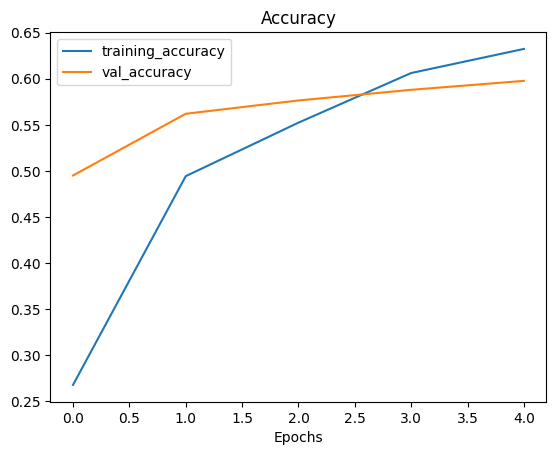

In [15]:
plot_loss_curves(history_0)

## Fine Tuning

In [16]:
base_model.trainable=True

for layer in base_model.layers[:-5]:
  layer.trainable=True

In [18]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])




In [21]:
history_fine_tuning=model_0.fit(train_data_10_percent,
            epochs=10,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=(0.15*len(test_data)),
            initial_epoch=history_0.epoch[-1],
            callbacks=[checkpoint_callback])

Epoch 5/10
237/237 [==============================] - 339s 1s/step - loss: 2.4644 - accuracy: 0.3982 - val_loss: 1.9746 - val_accuracy: 0.4861
Epoch 6/10
237/237 [==============================] - 210s 882ms/step - loss: 1.7118 - accuracy: 0.5468 - val_loss: 1.9459 - val_accuracy: 0.4982
Epoch 7/10
237/237 [==============================] - 191s 804ms/step - loss: 1.4298 - accuracy: 0.6099 - val_loss: 1.8080 - val_accuracy: 0.5460
Epoch 8/10
237/237 [==============================] - 178s 749ms/step - loss: 1.1755 - accuracy: 0.6639 - val_loss: 1.8202 - val_accuracy: 0.5478
Epoch 9/10
237/237 [==============================] - 154s 647ms/step - loss: 1.0015 - accuracy: 0.7188 - val_loss: 2.0429 - val_accuracy: 0.5176
Epoch 10/10
237/237 [==============================] - 168s 706ms/step - loss: 0.9004 - accuracy: 0.7374 - val_loss: 2.1994 - val_accuracy: 0.5097


In [ ]:
history_fine_tuning.evaluate(test_data)

In [ ]:
loaded_model=tf.keras.models.load_model("")

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2023-05-04 22:06:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  85.6MB/s    in 0.5s    

2023-05-04 22:06:42 (85.6 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [8]:
unzip_data("/content/06_101_food_class_10_percent_saved_big_dog_model.zip")

In [10]:
import tensorflow as tf
model=tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [13]:
model.evaluate(test_data)

790/790 [==============================] - 89s 99ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027230501174927, 0.6077623963356018]

In [14]:
pred_probs=model.predict(test_data)

790/790 [==============================] - 93s 111ms/step


In [15]:
pred_classes=pred_probs.argmax(axis=1)

In [16]:
y_labels=[]
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[73, 0, 88, 69, 27, 89, 95, 44, 76, 21]

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
sklearn_accuracy=accuracy_score(y_true=y_labels,
                                y_pred=pred_classes)

In [19]:
len(y_labels)

25250

In [20]:
len(pred_classes)

25250

In [21]:
len(pred_probs)

25250

In [22]:
pred_probs[1]

array([3.16404510e-07, 1.57902002e-06, 3.67432591e-08, 1.40129760e-06,
       8.39238874e-06, 2.35354435e-03, 1.56857069e-10, 7.10241920e-07,
       1.68393202e-10, 1.40650984e-04, 6.15011731e-06, 1.30040164e-03,
       4.39872494e-08, 1.03513839e-05, 6.93717368e-08, 4.71044565e-03,
       1.42764337e-02, 3.14446197e-07, 3.34602455e-03, 4.39823270e-05,
       5.92551942e-06, 2.49177976e-08, 1.26342306e-08, 3.51196069e-13,
       1.01353672e-08, 1.65855579e-06, 1.56560802e-07, 1.25164976e-10,
       2.04049434e-06, 8.91816967e-11, 7.49932472e-09, 1.74485193e-09,
       1.03925922e-05, 3.44349871e-07, 6.36762823e-04, 1.31357308e-06,
       1.56608978e-04, 5.48468088e-04, 7.32621493e-06, 7.42513976e-06,
       6.48878817e-09, 2.23239873e-12, 1.00886682e-05, 6.23904401e-04,
       2.59592139e-06, 2.03513242e-08, 1.07435105e-09, 2.76630071e-05,
       6.80659056e-01, 6.72001261e-05, 5.57464191e-05, 2.14187846e-01,
       2.36733667e-05, 1.11768768e-05, 2.33873181e-11, 1.06329834e-08,
      

In [23]:
sklearn_accuracy

0.011762376237623762

In [24]:
from helper_functions import make_confusion_matrix

In [27]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20,
                      savefig=True)

In [26]:
class_names=test_data.class_names

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_true=y_labels,
                      y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.02      0.01      0.01       250
           1       0.01      0.01      0.01       250
           2       0.01      0.01      0.01       250
           3       0.02      0.01      0.01       250
           4       0.00      0.00      0.00       250
           5       0.00      0.00      0.00       250
           6       0.03      0.03      0.03       250
           7       0.01      0.01      0.01       250
           8       0.01      0.01      0.01       250
           9       0.01      0.01      0.01       250
          10       0.02      0.02      0.02       250
          11       0.01      0.00      0.01       250
          12       0.02      0.03      0.03       250
          13       0.01      0.01      0.01       250
          14       0.02      0.02      0.02       250
          15       0.01      0.01      0.01       250
          16       0.01      0.02      0.01       250
          17       0.01    

In [30]:
classification_report_dict=classification_report(y_labels,pred_classes,output_dict=True)

In [33]:
classesF1_scores={}

for k,v in classification_report_dict.items():
  if k=="accuracy":
   break

  else:
    classesF1_scores[class_names[int(k)]]=v["f1-score"]

classesF1_scores

{'apple_pie': 0.014150943396226415,
 'baby_back_ribs': 0.006779661016949153,
 'baklava': 0.007434944237918215,
 'beef_carpaccio': 0.014018691588785047,
 'beef_tartare': 0.0,
 'beet_salad': 0.0031007751937984496,
 'beignets': 0.029357798165137613,
 'bibimbap': 0.012422360248447204,
 'bread_pudding': 0.008316008316008318,
 'breakfast_burrito': 0.009389671361502348,
 'bruschetta': 0.01904761904761905,
 'caesar_salad': 0.00505050505050505,
 'cannoli': 0.0264026402640264,
 'caprese_salad': 0.007751937984496124,
 'carrot_cake': 0.019417475728155338,
 'ceviche': 0.009302325581395349,
 'cheese_plate': 0.012030075187969926,
 'cheesecake': 0.010050251256281407,
 'chicken_curry': 0.013445378151260503,
 'chicken_quesadilla': 0.008492569002123142,
 'chicken_wings': 0.01142857142857143,
 'chocolate_cake': 0.0198019801980198,
 'chocolate_mousse': 0.0035778175313059034,
 'churros': 0.014787430683918669,
 'clam_chowder': 0.004282655246252676,
 'club_sandwich': 0.020618556701030927,
 'crab_cakes': 0.013

In [38]:
import pandas as pd

fi_scores=pd.DataFrame({"class_names":list(classesF1_scores.keys()),
                        "f1_scores":list(classesF1_scores.values())}).sort_values("f1_scores",ascending=False)

In [39]:
fi_scores

,class_names,f1_scores
6,beignets,0.029358
51,guacamole,0.028829
32,dumplings,0.026565
12,cannoli,0.026403
86,sashimi,0.025225
...,...,...
66,nachos,0.000000
4,beef_tartare,0.000000
56,huevos_rancheros,0.000000
98,tiramisu,0.000000


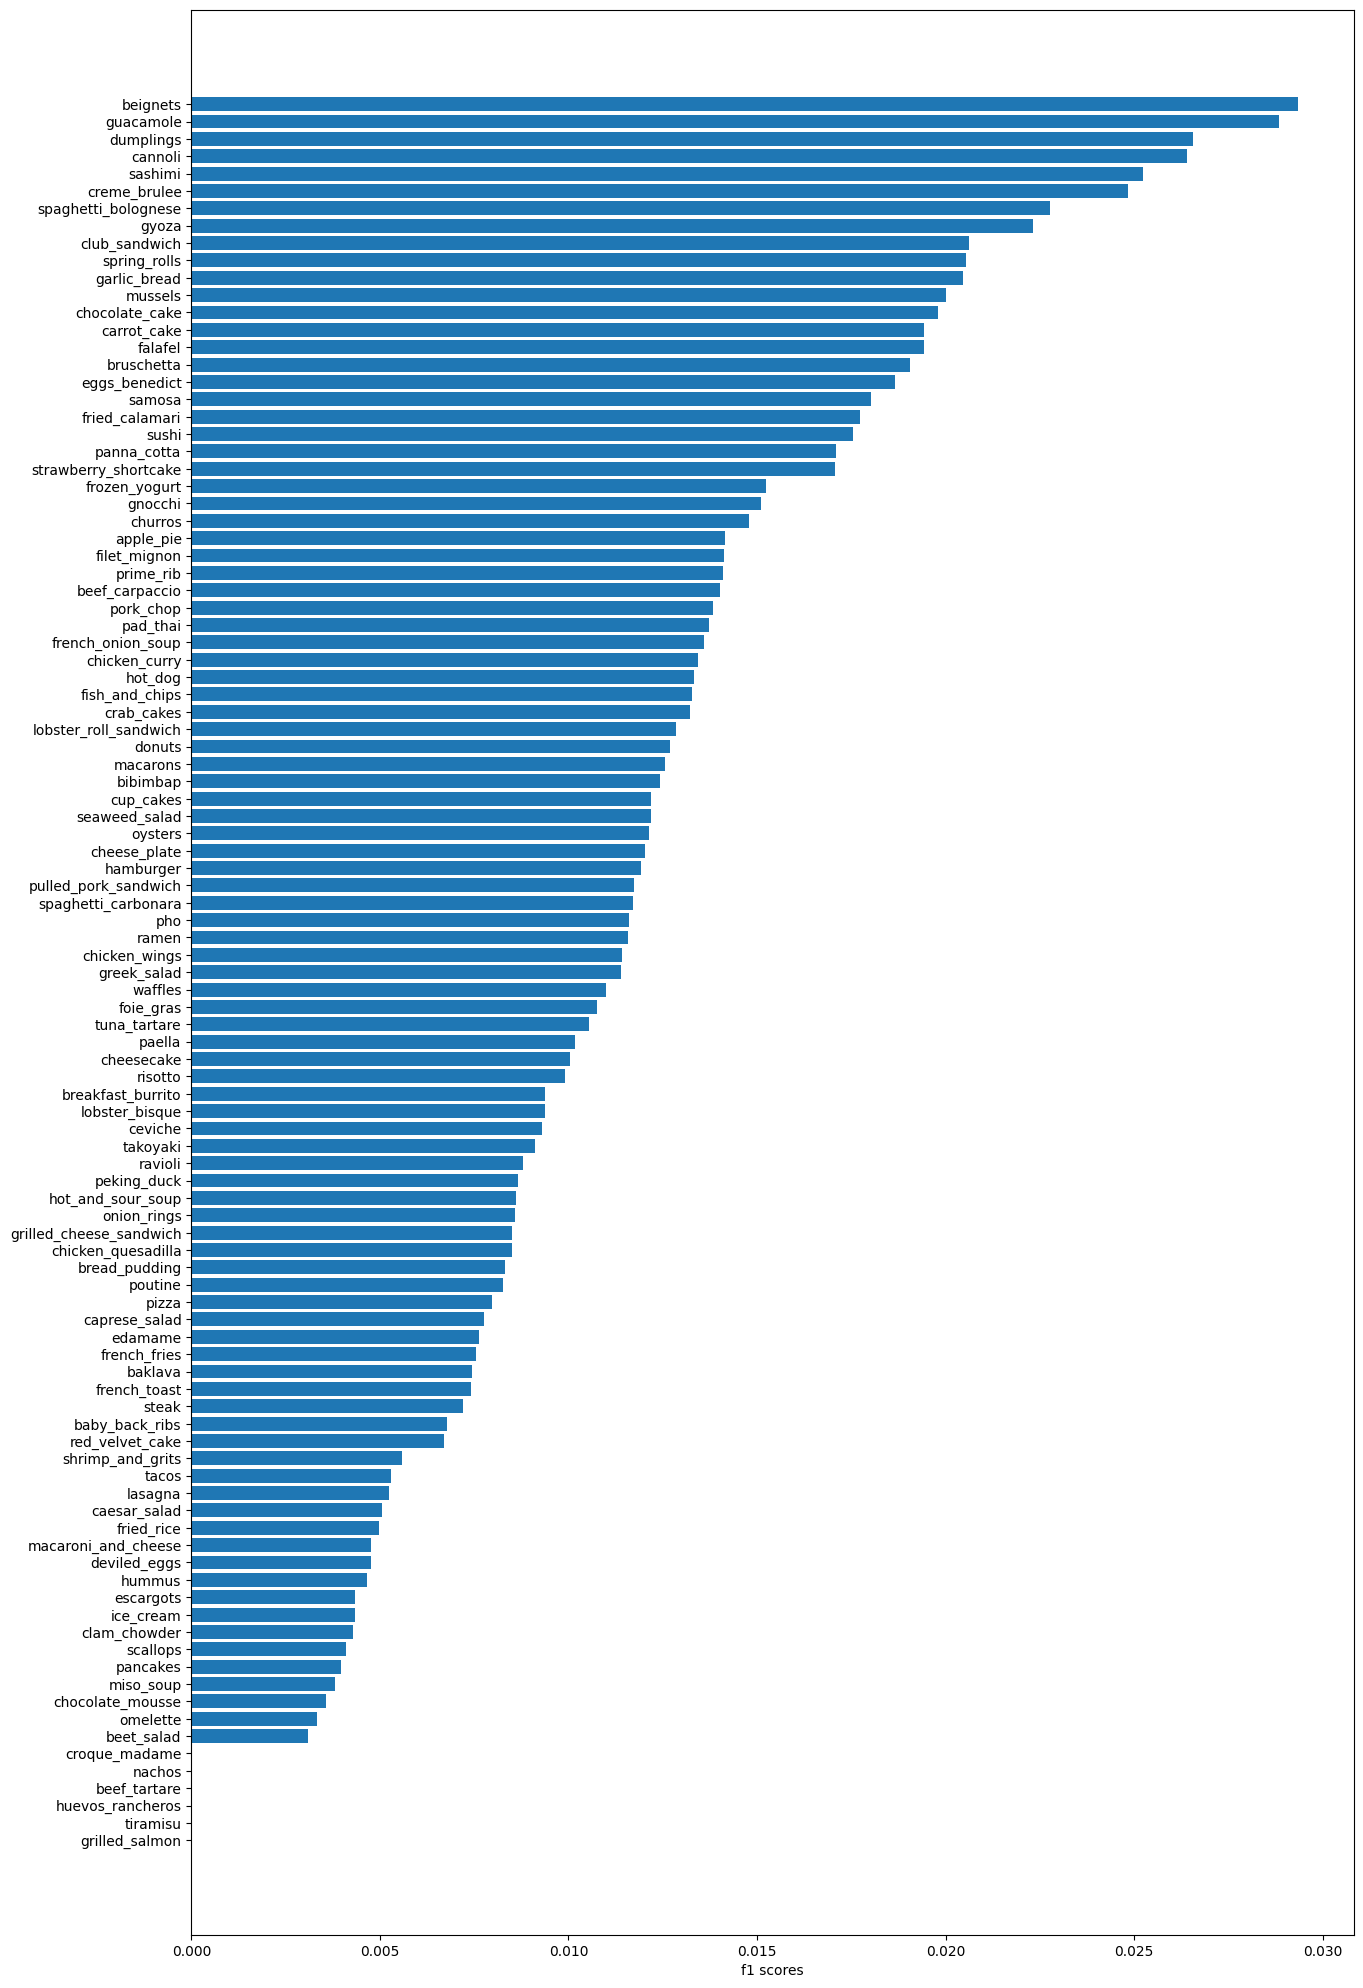

In [51]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(15,25))
scores=ax.barh(range(len(fi_scores)),fi_scores["f1_scores"].values)
ax.set_yticks(range(len(fi_scores)))
ax.set_yticklabels(fi_scores["class_names"])
plt.xlabel("f1 scores")
ax.invert_yaxis();

In [54]:
def load_and_prep_image(filename,img_shape=(224,224,3),scale=True):

  #decode image to numbers
  img=tf.io.read_file(filename)

   #converts to tensor
  img=tf.io.decode_image(img,chanels=3)
  #converts any image to a channel 3

  #resize

  img=tf.image.resize(img,[img_shape,img_shape])

  if scale:
   return  img/225

  else:
    return img

